# K-Means Clustering using Variance Threshold

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
        
features_file = '../../data/combined_features_scores.csv'
# Read the averaged features
df = pd.read_csv(features_file)

# Exclude target column from feature set
score_columns = ['song_id', ' valence_mean', ' valence_std', ' arousal_mean', ' arousal_std']
feature_cols = [col for col in df.columns if col not in score_columns]


# Select features with variance above a threshold (e.g., 0.5)
selector = VarianceThreshold(threshold=0.5)
selected_features = selector.fit_transform(df)

# Get the names of the selected features
feature_names = df.columns[selector.get_support()]
print("Selected Features based on Variance:", list(feature_names))
print("Number of Selected Features based on Variance:", len(feature_names))

Selected Features based on Variance: ['song_id', ' valence_mean', ' arousal_mean', 'frameTime', 'F0final_sma_stddev', 'F0final_sma_amean', 'logHNR_sma_stddev', 'logHNR_sma_amean', 'audspec_lengthL1norm_sma_amean', 'pcm_fftMag_fband250-650_sma_stddev', 'pcm_fftMag_fband250-650_sma_amean', 'pcm_fftMag_fband1000-4000_sma_stddev', 'pcm_fftMag_fband1000-4000_sma_amean', 'pcm_fftMag_spectralRollOff25.0_sma_stddev', 'pcm_fftMag_spectralRollOff25.0_sma_amean', 'pcm_fftMag_spectralRollOff50.0_sma_stddev', 'pcm_fftMag_spectralRollOff50.0_sma_amean', 'pcm_fftMag_spectralRollOff75.0_sma_stddev', 'pcm_fftMag_spectralRollOff75.0_sma_amean', 'pcm_fftMag_spectralRollOff90.0_sma_stddev', 'pcm_fftMag_spectralRollOff90.0_sma_amean', 'pcm_fftMag_spectralCentroid_sma_stddev', 'pcm_fftMag_spectralCentroid_sma_amean', 'pcm_fftMag_spectralVariance_sma_stddev', 'pcm_fftMag_spectralVariance_sma_amean', 'pcm_fftMag_spectralSkewness_sma_stddev', 'pcm_fftMag_spectralSkewness_sma_amean', 'pcm_fftMag_spectralKurtosi

In [2]:
df.head()

,song_id,valence_mean,valence_std,arousal_mean,arousal_std,frameTime,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,...,pcm_fftMag_mfcc_sma_de[10]_stddev,pcm_fftMag_mfcc_sma_de[10]_amean,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean
0,2,3.1,0.94,3.0,0.63,112.00,19.860414,93.884056,0.027706,0.742852,...,2.180024,5.369898e-04,2.230241,2.795768e-04,1.982235,2.542186e-04,1.918530,1.726519e-04,1.694786,-3.051494e-05
1,3,3.5,1.75,3.3,1.62,110.00,19.000312,62.682589,0.031728,0.754430,...,1.684190,2.858169e-04,1.792956,2.030164e-04,1.709216,5.744590e-05,1.519361,-5.567165e-05,1.391123,-8.473427e-06
2,4,5.7,1.42,5.5,1.63,113.75,48.175781,92.850316,0.042853,0.753095,...,2.133195,1.650659e-05,2.083527,4.228550e-04,2.022455,2.467478e-04,1.852797,3.383194e-05,1.590440,2.433487e-05
3,5,4.4,2.01,5.3,1.85,82.75,61.043677,158.673853,0.032721,0.757328,...,2.171685,-2.482530e-09,2.125705,-1.203645e-09,1.899873,-7.903614e-10,1.758863,2.250000e-09,1.553451,-7.647590e-10
4,7,5.8,1.47,6.4,1.69,59.75,14.317295,83.823484,0.036337,0.787512,...,1.899126,-7.397941e-04,1.652931,-5.146167e-04,1.616115,-3.012753e-04,1.455275,5.290876e-04,1.382201,2.044570e-04


In [3]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(df)

# Get cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.drop('cluster', axis=1).columns)
print("Cluster Centroids:\n", centroids)

# Identify top features based on centroid values (e.g., highest values)
# This requires domain knowledge to interpret what "top" means for your data

Cluster Centroids:
        song_id   valence_mean   valence_std   arousal_mean   arousal_std  \
0  1224.480000       5.435233      1.508867       5.493433      1.491567   
1  1241.428571       5.688571      1.514286       5.591429      1.498857   
2  1012.234153       4.368939      1.519366       4.153169      1.441824   
3  1084.147287       5.723256      1.545814       5.798450      1.456822   
4  1127.201770       5.118779      1.464991       5.084513      1.475097   

   frameTime  F0final_sma_stddev  F0final_sma_amean  \
0  57.973333           63.401435         107.935819   
1  49.550000           76.129608         105.703153   
2  65.389715           53.699659         148.281349   
3  70.426357           66.513911          99.854049   
4  62.296722           61.057160         118.855703   

   voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  ...  \
0                          0.060173                         0.739389  ...   
1                          0.079426   

In [4]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['hierarchical_cluster'] = hierarchical_clustering.fit_predict(selected_features)

# Display the cluster assignments
print("Hierarchical Clustering Assignments:\n", df['hierarchical_cluster'].value_counts())

# Show features in each hierarchical cluster
for cluster_id in range(4):
    cluster_data = df[df['hierarchical_cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Features:\n", cluster_data[feature_cols].mean())

Hierarchical Clustering Assignments:
 hierarchical_cluster
2    928
1    652
3    157
0     65
Name: count, dtype: int64

Cluster 0 Features:
 frameTime                             58.676923
F0final_sma_stddev                    72.523639
F0final_sma_amean                    104.809940
voicingFinalUnclipped_sma_stddev       0.081704
voicingFinalUnclipped_sma_amean        0.719207
                                        ...    
pcm_fftMag_mfcc_sma_de[12]_amean      -0.000186
pcm_fftMag_mfcc_sma_de[13]_stddev      2.183076
pcm_fftMag_mfcc_sma_de[13]_amean      -0.000253
pcm_fftMag_mfcc_sma_de[14]_stddev      1.928071
pcm_fftMag_mfcc_sma_de[14]_amean       0.000092
Length: 261, dtype: float64

Cluster 1 Features:
 frameTime                             60.587650
F0final_sma_stddev                    61.875307
F0final_sma_amean                    113.964522
voicingFinalUnclipped_sma_stddev       0.052798
voicingFinalUnclipped_sma_amean        0.748111
                                       

Selected features: [[ 2.00000000e+00  3.10000000e+00  3.00000000e+00 ...  3.72216313e+02
   9.17431111e-01  6.48346849e+01]
 [ 3.00000000e+00  3.50000000e+00  3.30000000e+00 ...  3.05681849e+00
   1.75366191e+00  2.94178430e+02]
 [ 4.00000000e+00  5.70000000e+00  5.50000000e+00 ... -1.07876485e+01
   1.30826347e+00  1.25672575e+02]
 ...
 [ 2.05600000e+03  5.00000000e+00  4.60000000e+00 ... -3.66535079e+02
   1.46453157e+00  1.24792207e+02]
 [ 2.05700000e+03  3.17000000e+00  6.83000000e+00 ... -3.89367638e+02
   5.38959342e-01  1.72610595e+01]
 [ 2.05800000e+03  3.80000000e+00  5.80000000e+00 ... -2.91841517e+02
   7.13035567e-01  6.31668917e+01]]


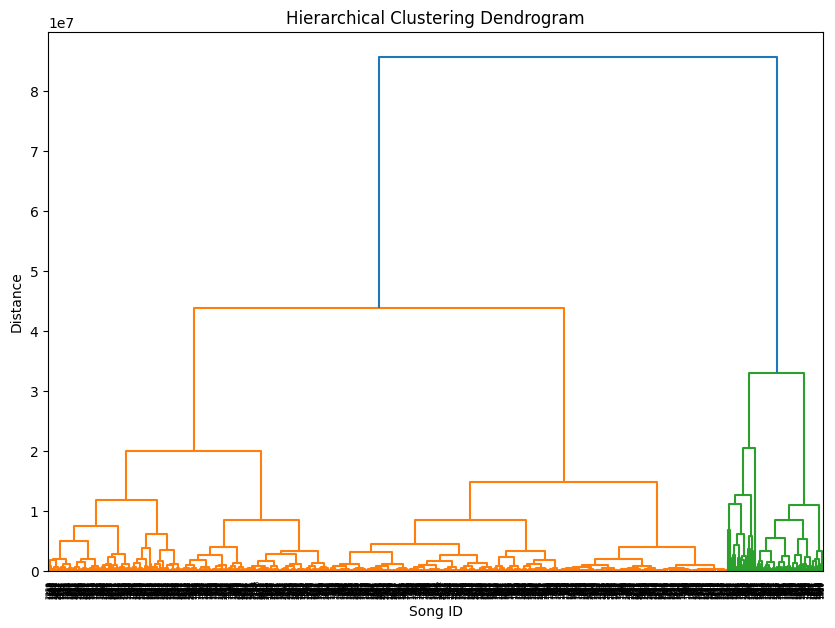

In [5]:
# Display dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
print(f"Selected features: {selected_features}")
linked = linkage(selected_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['song_id'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Song ID')
plt.ylabel('Distance')
plt.show()

# Clustering using Important Features (from SHAP)

In [6]:
top_features = ['audspec_lengthL1norm_sma_de_stddev', 'pcm_fftMag_mfcc_sma[1]_amean', 'audspec_lengthL1norm_sma_amean', 'pcm_fftMag_spectralEntropy_sma_de_stddev', 'pcm_fftMag_spectralFlux_sma_amean', 'pcm_fftMag_spectralFlux_sma_de_stddev', 'frameTime', 'pcm_fftMag_spectralVariance_sma_amean', 'F0final_sma_de_stddev', 'pcm_fftMag_psySharpness_sma_de_stddev']

# Reload datafarme
df = pd.read_csv(features_file)
X = df[top_features]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)  # try different k
labels = kmeans.fit_predict(X_scaled)

df["cluster"] = labels

In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.2097476070559234


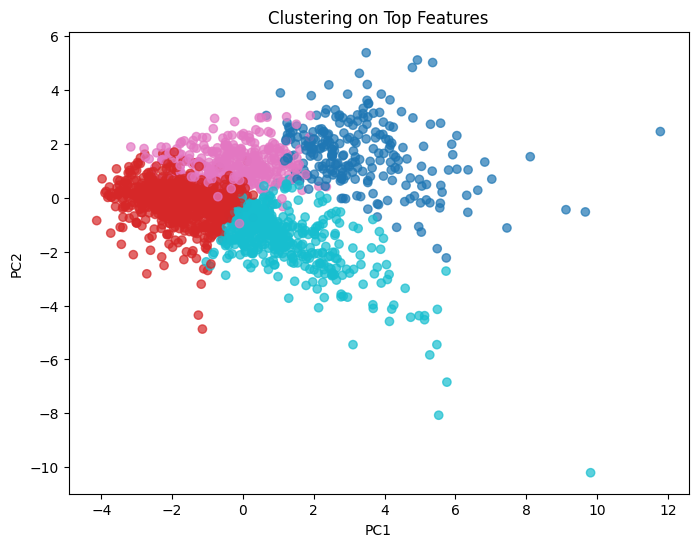

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10", alpha=0.7)
plt.title("Clustering on Top Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [11]:
cluster_means = df.groupby("cluster")[[" valence_mean", " arousal_mean"]].mean()
print(cluster_means)

         valence_mean  arousal_mean
cluster                            
0            5.834959      5.565950
1            4.433112      4.058340
2            4.430163      4.791362
3            5.519574      5.607043
